In [129]:
# Data Loading and Managing
import numpy as np
import pandas as pd
from tensorflow import keras

# Data Visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Model 
# import xgboost as xgb
from sklearn.svm import SVR
from tensorflow.keras import layers
from sklearn.tree import  DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [130]:
# Load data
df = pd.read_csv('ds_salaries.csv')

In [131]:
# Quick look
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [132]:
# Information about the data columns/features.=
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [133]:
# Cross check for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [134]:
# Extract all categorical columns
categorical_columns = df.columns[df.dtypes == 'object']

# Quick look
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [135]:
# Extract the sub-categories of each category
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col} : {unique_values}\n")

experience_level : ['SE' 'MI' 'EN' 'EX']

employment_type : ['FT' 'CT' 'FL' 'PT']

job_title : ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Da

In [136]:
# Descriptive analysis
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Plot to see what affect the Salary in US

In [137]:
# Extract the value counts for years
data_values = df.work_year.value_counts()

# Create a pie chart
fig = go.Figure(data=go.Pie(
    labels=data_values.index, 
    values=data_values.values, 
    hole=0.4, 
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(
        colors=px.colors.sequential.RdBu, 
        line=dict(
            color='honeydew', 
            width=2
        )
    ),
))

# Update layout
fig.update_layout(
    title="Distribution of Data Entries across Years",
    annotations=[dict(text="Year Overview", showarrow=False, font_size=20)],
    height=600
)

# Show the pie chart
fig.show()

In [138]:
# Understanding Salary Distribution
mean_salary = df.groupby('work_year')['salary_in_usd'].mean()

# Create subplots with shared x-axis
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=mean_salary.index,
    y=mean_salary.values,
    name="Mean Salary",
    marker=dict(color='steelblue') 
)
fig.add_trace(bar_trace)

# Add line trace
line_trace = go.Scatter(
    x=mean_salary.index,
    y=mean_salary.values,
    name="Mean Salary",
    mode="lines+markers", 
    line=dict(color='darkorange'),
    marker=dict(symbol='circle-open', size=15)
)
fig.add_trace(line_trace)

# Update layout
fig.update_layout(
    title="Examining Mean Salary by Year",
    xaxis_title="Working Year",
    yaxis_title="Mean Salary",
    height=600
)

# Show the combined plot
fig.show()

In [139]:
# Create a histogram with facet columns
fig = px.histogram(
    data_frame=df,
    x='experience_level',
    facet_col='work_year',
    nbins=7,
    text_auto=True,
    labels={'experience_level': 'Experience Level', 'count': 'Count'},
    title='Distribution of Experience Levels across Work Years'
)

# Configure histogram aesthetics
fig.update_traces(
    textposition='auto',
    marker_color='brown',
)

# Update layout
fig.update_layout(yaxis_title='Count')

# Show the histogram
fig.show()

In [140]:
# Determine the mean salary based on Experience Level
count_values = df.experience_level.value_counts()
salary_values = df.groupby('experience_level').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    pull=[0, 0, 0, 0.2],
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    pull=[0, 0.2, 0, 0],
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Experience Level",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)

# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Experience Levels",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [141]:
# Determine the mean salary based on Employment Type
count_values = df.employment_type.value_counts()
salary_values = df.groupby('employment_type').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Employment Type",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)
 
# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Employment Type",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [142]:
# Create a Sunburst chart
fig = px.sunburst(df, path=['experience_level', 'employment_type', 'work_year'], values='salary_in_usd')

# Update layout settings
fig.update_layout(
    title='Total Salary Distribution by Work Year and Experience Level and Employment Type',  # Set the title
    height=600  # Set the height of the figure
)

# Display the figure
fig.show()

In [143]:
# Determine the mean salary based on Company Size
count_values = df.company_size.value_counts()
salary_values = df.groupby('company_size').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Company Size",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)

# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Company Size",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [144]:
# Box Plot of Remote Ratio vs Salary by Work Year
box_plot = px.box(
    data_frame=df,
    x='remote_ratio',
    y='salary_in_usd',
    color='work_year',
    title='Remote Ratio vs Salary by Work Year',
    labels={'remote_ratio': 'Remote Ratio', 'salary_in_usd': 'Salary (USD)', 'work_year': 'Work Year'},
    height=500
)
box_plot.show()

In [145]:
# Group the data by job title and calculate the average salary for each title
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Create a bar chart for average salary by job title
fig_salary_impact = px.bar(
    average_salary_by_job_title,
    x='job_title',
    y='salary_in_usd',
    title='Average Salary by Job Title',
    labels={'salary_in_usd': 'Average Salary (USD)'},
    height=500
)

# Show the bar chart
fig_salary_impact.show()

In [146]:
# Group the data by company location and calculate the average salary for each location
average_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Create a bar chart for average salary by company location
fig_salary_by_location = px.bar(
    average_salary_by_location,
    x='company_location',
    y='salary_in_usd',
    title='Average Salary by Company Location',
    labels={'salary_in_usd': 'Average Salary (USD)'},
    height=500
)

# Show the bar chart
fig_salary_by_location.show()

In [147]:
# Group the data by employee residence and calculate the average salary for each residence
average_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Create a bar chart for average salary by employee residence
fig_salary_by_residence = px.bar(
    average_salary_by_residence,
    x='employee_residence',
    y='salary_in_usd',
    title='Average Salary by Employee Residence',
    labels={'salary_in_usd': 'Average Salary (USD)'},
    height=500
)

# Show the bar chart
fig_salary_by_residence.show()

Start to process the data

In [148]:
data_new = df.copy()

In [149]:
data_new.drop(columns=['salary_currency', 'salary'], inplace=True)


In [150]:
# Get the categorical columns
categorical_cols = data_new.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = LabelEncoder()

# Apply label encoding to all categorical columns
data_new[categorical_cols] = data_new[categorical_cols].apply(lambda col: encoder.fit_transform(col))

# Display the processed data
print(data_new.head())


   work_year  experience_level  employment_type  job_title  salary_in_usd  \
0       2023                 3                2         84          85847   
1       2023                 2                0         66          30000   
2       2023                 2                0         66          25500   
3       2023                 3                2         47         175000   
4       2023                 3                2         47         120000   

   employee_residence  remote_ratio  company_location  company_size  
0                  26           100                25             0  
1                  75           100                70             2  
2                  75           100                70             2  
3                  11           100                12             1  
4                  11           100                12             1  


Using Standar Scaler

In [151]:
# Initialize Standard Scaler
scaler = StandardScaler()

# Splitted into features and tagert
mirror_data = data_new.copy()
target = mirror_data.pop('salary_in_usd').to_numpy()
features = mirror_data.to_numpy()

# Apply standard scaler
scalled_data = scaler.fit_transform(features)

In [152]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# Scale the target variable
y_scaled = scaler.fit_transform(target.reshape(-1, 1))

Start Applying Model

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scalled_data, y_scaled, test_size=0.2, random_state=42)




In [155]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}, R^2: {dt_r2}")



Decision Tree MSE: 0.7146279761182799, R^2: 0.2804549504618694


In [156]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())  # Use ravel() to convert to a 1D array
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}, R^2: {rf_r2}")




Random Forest MSE: 0.6012078879168927, R^2: 0.39465543758354726


In [157]:
# Support Vector Machine (SVR)
svm_model = SVR()
svm_model.fit(X_train, y_train.ravel())  # Use ravel() to convert to a 1D array
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse}, R^2: {svm_r2}")



SVM MSE: 0.6397856370419523, R^2: 0.35581225017289053


In [158]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}, R^2: {lr_r2}")

Linear Regression MSE: 0.7168631972730609, R^2: 0.2782043496313761


Recurrent Neural Network (RNN):


In [159]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Assuming you have scaled_data and target from your dataset

# Reshape data for RNN (assuming time steps = number of features)
rnn_data = scalled_data.reshape(-1, scalled_data.shape[1], 1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(scalled_data.shape[1], 1), activation='relu'))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1, activation='linear'))  # Assuming regression task

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
rnn_model.fit(rnn_data, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.8049 - mse: 0.8049 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7323 - mse: 0.7323 - val_loss: 0.8058 - val_mse: 0.8058
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7155 - mse: 0.7155 - val_loss: 0.7701 - val_mse: 0.7701
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6976 - mse: 0.6976 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6868 - mse: 0.6868 - val_loss: 0.7428 - val_mse: 0.7428
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6834 - mse: 0.6834 - val_loss: 0.7525 - val_mse: 0.7525
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6675 - mse: 0.6675 - val_loss: 0.7680 - val_mse: 0.7680
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6614 - mse: 0.66

Feed Forward Neural Network (FNN):


In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have scaled_data and target from your dataset

# Define FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, input_dim=scalled_data.shape[1], activation='relu'))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(1, activation='linear'))  # Assuming regression task

# Compile the model
fnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
fnn_model.fit(scalled_data, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.7956 - mse: 0.7956 - val_loss: 0.7999 - val_mse: 0.7999
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7157 - mse: 0.7157 - val_loss: 0.8471 - val_mse: 0.8471
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7048 - mse: 0.7048 - val_loss: 0.7783 - val_mse: 0.7783
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6949 - mse: 0.6949 - val_loss: 0.8710 - val_mse: 0.8710
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6864 - mse: 0.6864 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6788 - mse: 0.6788 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6753 - mse: 0.6753 - val_loss: 0.8236 - val_mse: 0.8236
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6719 - mse: 0.67

Ploting the mse and evaluate

24/24 [==============================] - 0s 913us/step


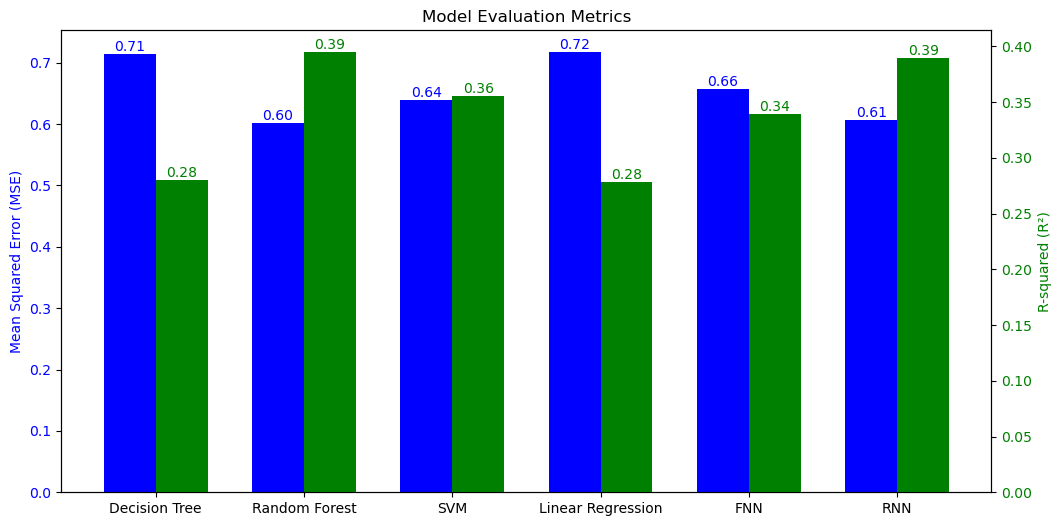

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have trained models (fnn_model, rnn_model) and X_test, y_test available

# Function to evaluate and return MSE and R-squared
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Evaluate each model
models = [dt_model, rf_model, svm_model, lr_model, fnn_model, rnn_model]
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'Linear Regression', 'FNN', 'RNN']

mse_scores = []
r2_scores = []

for model in models:
    mse, r2 = evaluate_model(model, X_test, y_test)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Plotting
bar_width = 0.35
index = np.arange(len(model_names))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE
bars1 = ax1.bar(index - bar_width/2, mse_scores, bar_width, label='MSE', color='blue')
ax1.set_ylabel('Mean Squared Error (MSE)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R-squared
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, r2_scores, bar_width, label='R²', color='green')
ax2.set_ylabel('R-squared (R²)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Annotate bars with values
for bar, mse, r2 in zip(bars1, mse_scores, r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{mse:.2f}', ha='center', va='bottom', color='blue')

for bar, r2 in zip(bars2, r2_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{r2:.2f}', ha='center', va='bottom', color='green')

plt.title('Model Evaluation Metrics')
plt.xticks(index, model_names)
plt.show()



Drop Some Features To Improve The Model and Overfitting

In [250]:
#clone the data set
data_new_set = df.copy()
data_new_set.drop(columns=['salary','salary_in_usd','salary_currency'], inplace=True)


In [251]:
# Get the categorical columns
categorical_cols = data_new_set.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = LabelEncoder()

# Apply label encoding to all categorical columns
data_new_set[categorical_cols] = data_new_set[categorical_cols].apply(lambda col: encoder.fit_transform(col))

# Display the processed data
print(data_new_set.head())


   work_year  experience_level  employment_type  job_title  \
0       2023                 3                2         84   
1       2023                 2                0         66   
2       2023                 2                0         66   
3       2023                 3                2         47   
4       2023                 3                2         47   

   employee_residence  remote_ratio  company_location  company_size  
0                  26           100                25             0  
1                  75           100                70             2  
2                  75           100                70             2  
3                  11           100                12             1  
4                  11           100                12             1  


In [252]:
# Generate feature correlation
linear_corr = data_new_set.corr(method='pearson').round(2)

# Visualize correlation
corr_heatmap = px.imshow(linear_corr,
                         text_auto=True,
                         labels=dict(x="Features", y="Features",
                                     color="Correlation"),
                         color_continuous_scale=px.colors.sequential.RdBu,
                         title="Linear Correlation (Heatmap)",
                         height=600
                         )

corr_heatmap.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title="Features",
    yaxis_title="Features",
    coloraxis_colorbar_title="Correlation"
)

corr_heatmap.show()

In [294]:
# Create a correlation matrix
correlation_matrix = data_new_set.corr(method='pearson').round(2)

# Set a threshold for correlation (excluding negative correlations)
correlation_threshold = 0.2  # Adjust based on your preferences and data characteristics

# Find features with correlations above the threshold
selected_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            selected_features.add(colname)
            
            
# Print selected features
print("Selected Features:", selected_features)

# Convert set to list
selected_features_list = list(selected_features)

# Select only the features above the threshold
df_selected_features = data_new_set[selected_features_list]

# Drop highly correlated features
df_dropped_corr = data_new_set.drop(columns=selected_features_list)

# Print the shape of the new dataframe
print("Shape of the DataFrame after dropping:", df_dropped_corr.shape)




Selected Features: {'company_location', 'employee_residence', 'remote_ratio'}
Shape of the DataFrame after dropping: (3755, 5)


In [295]:
print(df_dropped_corr)

      work_year  experience_level  employment_type  job_title  company_size
0          2023                 3                2         84             0
1          2023                 2                0         66             2
2          2023                 2                0         66             2
3          2023                 3                2         47             1
4          2023                 3                2         47             1
...         ...               ...              ...        ...           ...
3750       2020                 3                2         47             0
3751       2021                 2                2         84             0
3752       2020                 0                2         47             2
3753       2020                 0                0         17             0
3754       2021                 3                2         45             0

[3755 rows x 5 columns]


In [296]:
# Splitted into features and tagert
mirror_data = df.copy()
target = mirror_data.pop('salary_in_usd').to_numpy()
features = df_dropped_corr.to_numpy()


In [310]:
# Initialize Standard Scaler
scaler = StandardScaler()
# Apply standard scaler
scaled_data = scaler.fit_transform(features)

In [307]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# Scale the target variable
y_scaled = scaler.fit_transform(target.reshape(-1, 1))

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y_scaled, test_size=0.2, random_state=42)

In [312]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}, R^2: {dt_r2}")



Decision Tree MSE: 0.912051784287778, R^2: 0.08167274688659831


In [313]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())  # Use ravel() to convert to a 1D array
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}, R^2: {rf_r2}")




Random Forest MSE: 0.792247592800083, R^2: 0.2023012637928847


In [314]:
# Support Vector Machine (SVR)
svm_model = SVR()
svm_model.fit(X_train, y_train.ravel())  # Use ravel() to convert to a 1D array
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse}, R^2: {svm_r2}")



SVM MSE: 0.7657820696895732, R^2: 0.2289488857360431


In [315]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}, R^2: {lr_r2}")

Linear Regression MSE: 0.8355503286518301, R^2: 0.1587005788843151


RNN

In [316]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Assuming you have scaled_data and target from your dataset

# Reshape data for RNN (assuming time steps = number of features)
rnn_data = scalled_data.reshape(-1, scalled_data.shape[1], 1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(scalled_data.shape[1], 1), activation='relu'))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1, activation='linear'))  # Assuming regression task

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
rnn_model.fit(rnn_data, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.8236 - mse: 0.8236 - val_loss: 1.0401 - val_mse: 1.0401
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7839 - mse: 0.7839 - val_loss: 0.9649 - val_mse: 0.9649
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7802 - mse: 0.7802 - val_loss: 0.9367 - val_mse: 0.9367
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7662 - mse: 0.7662 - val_loss: 1.0605 - val_mse: 1.0605
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7658 - mse: 0.7658 - val_loss: 1.0424 - val_mse: 1.0424
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7500 - mse: 0.7500 - val_loss: 1.1062 - val_mse: 1.1062
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7447 - mse: 0.7447 - val_loss: 0.9830 - val_mse: 0.9830
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7416 - mse: 0.74

FNN

In [317]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have scaled_data and target from your dataset

# Define FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, input_dim=scalled_data.shape[1], activation='relu'))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(1, activation='linear'))  # Assuming regression task

# Compile the model
fnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
fnn_model.fit(scalled_data, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.8353 - mse: 0.8353 - val_loss: 0.9515 - val_mse: 0.9515
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7888 - mse: 0.7888 - val_loss: 0.9351 - val_mse: 0.9351
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7781 - mse: 0.7781 - val_loss: 0.9173 - val_mse: 0.9173
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7709 - mse: 0.7709 - val_loss: 0.9457 - val_mse: 0.9457
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7675 - mse: 0.7675 - val_loss: 0.9704 - val_mse: 0.9704
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7647 - mse: 0.7647 - val_loss: 0.9277 - val_mse: 0.9277
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7621 - mse: 0.7621 - val_loss: 0.9713 - val_mse: 0.9713
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7616 - mse: 0.76

24/24 [==============================] - 0s 1ms/step


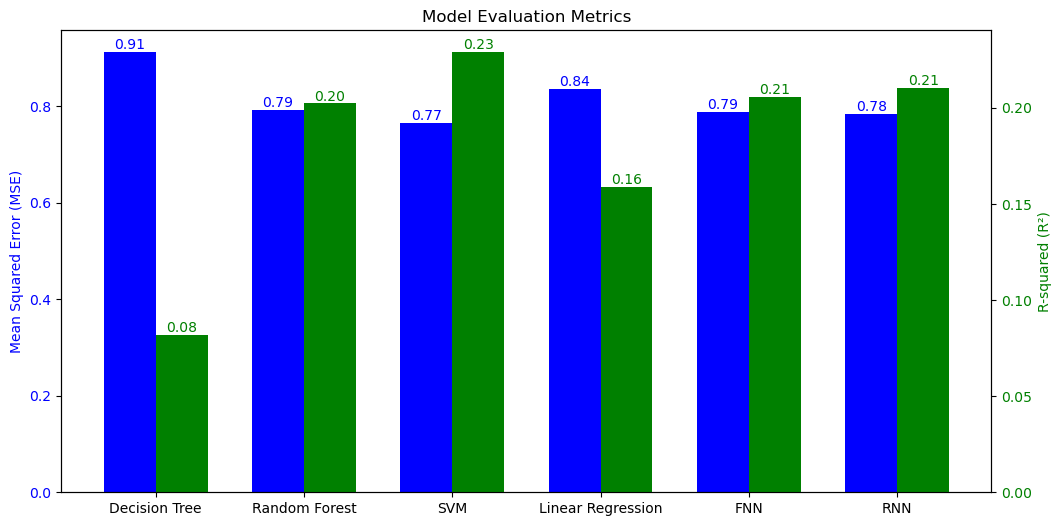

In [318]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have trained models (fnn_model, rnn_model) and X_test, y_test available

# Function to evaluate and return MSE and R-squared
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Evaluate each model
models = [dt_model, rf_model, svm_model, lr_model, fnn_model, rnn_model]
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'Linear Regression', 'FNN', 'RNN']

mse_scores = []
r2_scores = []

for model in models:
    mse, r2 = evaluate_model(model, X_test, y_test)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Plotting
bar_width = 0.35
index = np.arange(len(model_names))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE
bars1 = ax1.bar(index - bar_width/2, mse_scores, bar_width, label='MSE', color='blue')
ax1.set_ylabel('Mean Squared Error (MSE)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for R-squared
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, r2_scores, bar_width, label='R²', color='green')
ax2.set_ylabel('R-squared (R²)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Annotate bars with values
for bar, mse, r2 in zip(bars1, mse_scores, r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{mse:.2f}', ha='center', va='bottom', color='blue')

for bar, r2 in zip(bars2, r2_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{r2:.2f}', ha='center', va='bottom', color='green')

plt.title('Model Evaluation Metrics')
plt.xticks(index, model_names)
plt.show()

